# Credit Card Fraud Detection

### Problem Statement

Banking fraud is defined as any dishonest act or behavior to obtain privileged banking information without authorization from the user for monetary gain. 

Retaining profitable customers takes the top priority for most banks and credit card fraud is a significant threat to this goal. The rise in digital payment platforms is leading to an exorbitant rise in fraudulent transactions that threaten the sanctity of these banks and the trust of customers. Thereby, credit card fraud detection using machine learning is not just a trend but a necessity to proactively monitor and deter its occurrence. 

### Approach
The dataset used in this study contains credit card transactions for September 2013 by several European cardholders. The dataset, however, is heavily unbalanced; only 0.172% of all transactions are classified as fraud and its features had been transformed using PCA to protect classified information, leaving only amount and time fields as it is. 

The objective of the study is to create a model using the given dataset that best identifies fraudulent transactions.

Steps:
1.	Data pre-processing and Exploratory Data Analysis
2.	Model Building
3.	Model Evaluation


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#import all the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)


In [3]:
#read the dataset
df = pd.read_csv('creditcard.csv')
#display the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Preparation and EDA

In [4]:
#fetch detailed information of each column and check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#drop all null values
df.dropna(inplace=True)

In [6]:
#create classes for normal and fraud share and check class imbalance
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

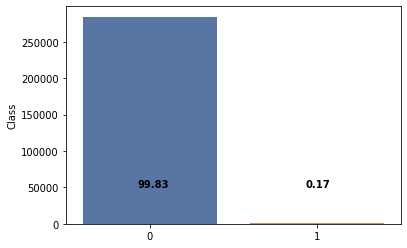

In [7]:
# Visualizing the class imbalance
#sns.set(font_scale=1.3)
ax=sns.barplot(x=classes.index,y=classes,palette='deep')
ax.text(0-0.07, 50000, str(round(normal_share,2)), color='black', fontweight='bold')
ax.text(1-0.07, 50000, str(round(fraud_share,2)), color='black', fontweight='bold')
plt.show()

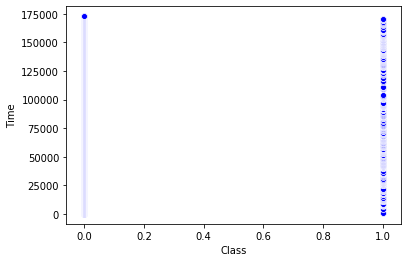

In [8]:
sns.scatterplot(data=df,x='Class',y='Time',color='b') #Scatter plot of class w.r.t time
plt.show()

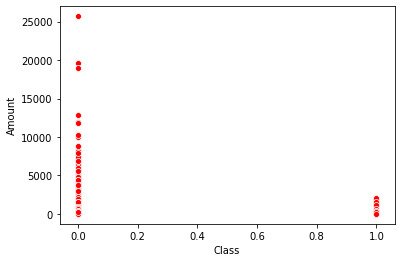

In [9]:
sns.scatterplot(data=df,x='Class',y='Amount',color='r') #Scatterplot of class w.r.t amount
plt.show()

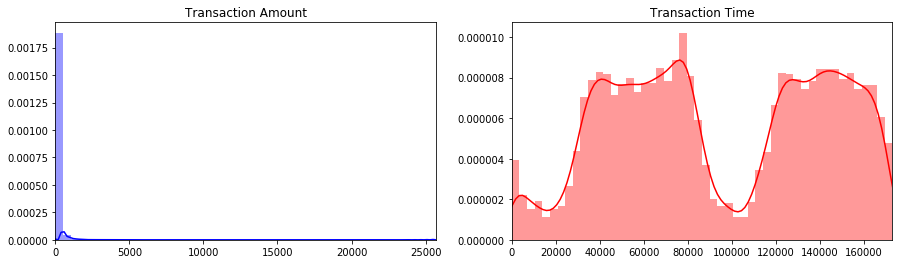

In [10]:
# Visualize the distribution on Amount and Time fields as they are not Gaussian and might need to be scaled
fig, ax = plt.subplots(1, 2, figsize=(15,4))

sns.distplot(df['Amount'].values, ax=ax[0], color='b')
ax[0].set_title('Transaction Amount', fontsize=12)
ax[0].set_xlim([min(df['Amount'].values), max(df['Amount'].values)])

sns.distplot(df['Time'].values, ax=ax[1], color='r')
ax[1].set_title('Transaction Time', fontsize=12)
ax[1].set_xlim([min(df['Time'].values), max(df['Time'].values)])

plt.show()

### Outlier Treatment

In [11]:
# Removing outliers from all columns ( Outliers were detected from the boxplots however they are not drawn for convenience sake)
for i in [i for i in df.columns if i!='Class']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df[i]=df[i].apply(lambda x:x if (x >= (Q1 - 1.5 * IQR)) & (x<=(Q3 + 1.5 * IQR))
                      else (Q1 - 1.5 * IQR) if x< (Q1 - 1.5 * IQR)
                      else (Q3 + 1.5 * IQR))


### EDA

##### Let's see how the feature 'class' interacts with other features i.e V1 to V28 and 'time and 'amount'.

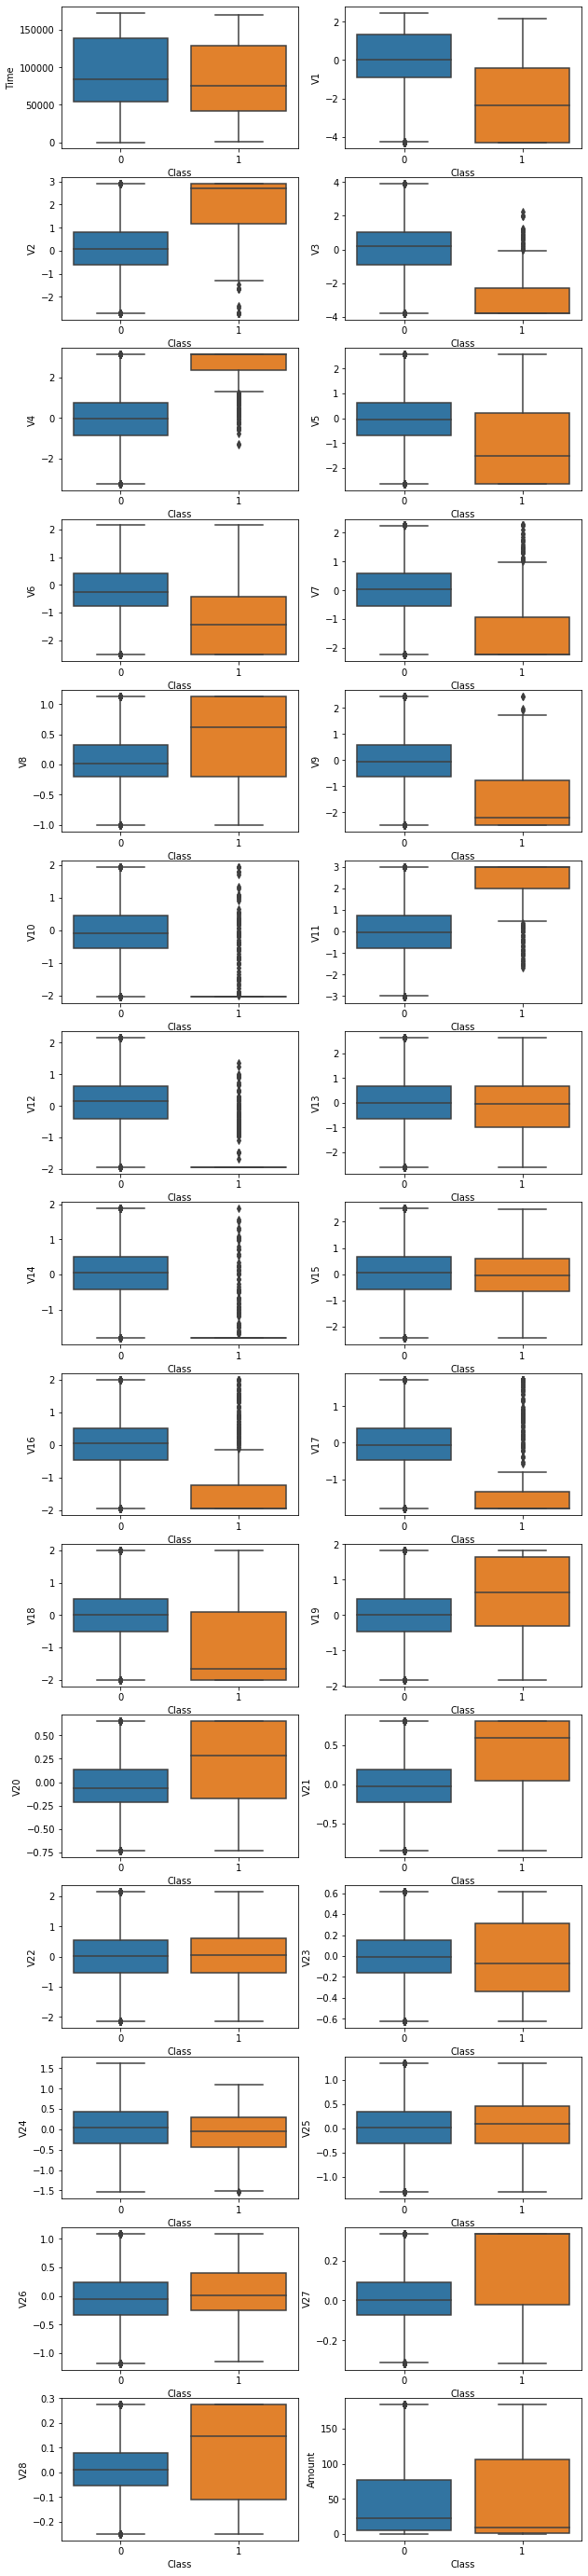

In [12]:
plt.figure(figsize = (10,50))
var = [i for i in df.columns if i!='Class']
for i in enumerate(var):
    plt.subplot(15,2,i[0]+1)
    sns.boxplot(x= 'Class', y = i[1], data = df) 

Following variables were removed from modelling as they donot show any significant difference in distribution across the target variables (not enough correlation)
- **V25**
- **V22**
- **V15**
- **V13**
- **V24**

In [13]:
#drop the features V13, V15, V22, V24 and V25
df.drop(columns=['V13','V15','V22','V24','V25'],inplace=True)

In [14]:
#drop the 'class' column
y=df['Class']
X=df.drop(columns='Class')

In [15]:
from sklearn.model_selection import train_test_split
# Splitting into training and test data-sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y) #Stratify the split on class

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train[['Amount','Time']]=scaler.fit_transform(X_train[['Amount','Time']]) #Scaling time and amount fields as the rest are PCA
X_test[['Amount','Time']]=scaler.transform(X_test[['Amount','Time']]) #transformed and supposed to be Gaussian distributed.

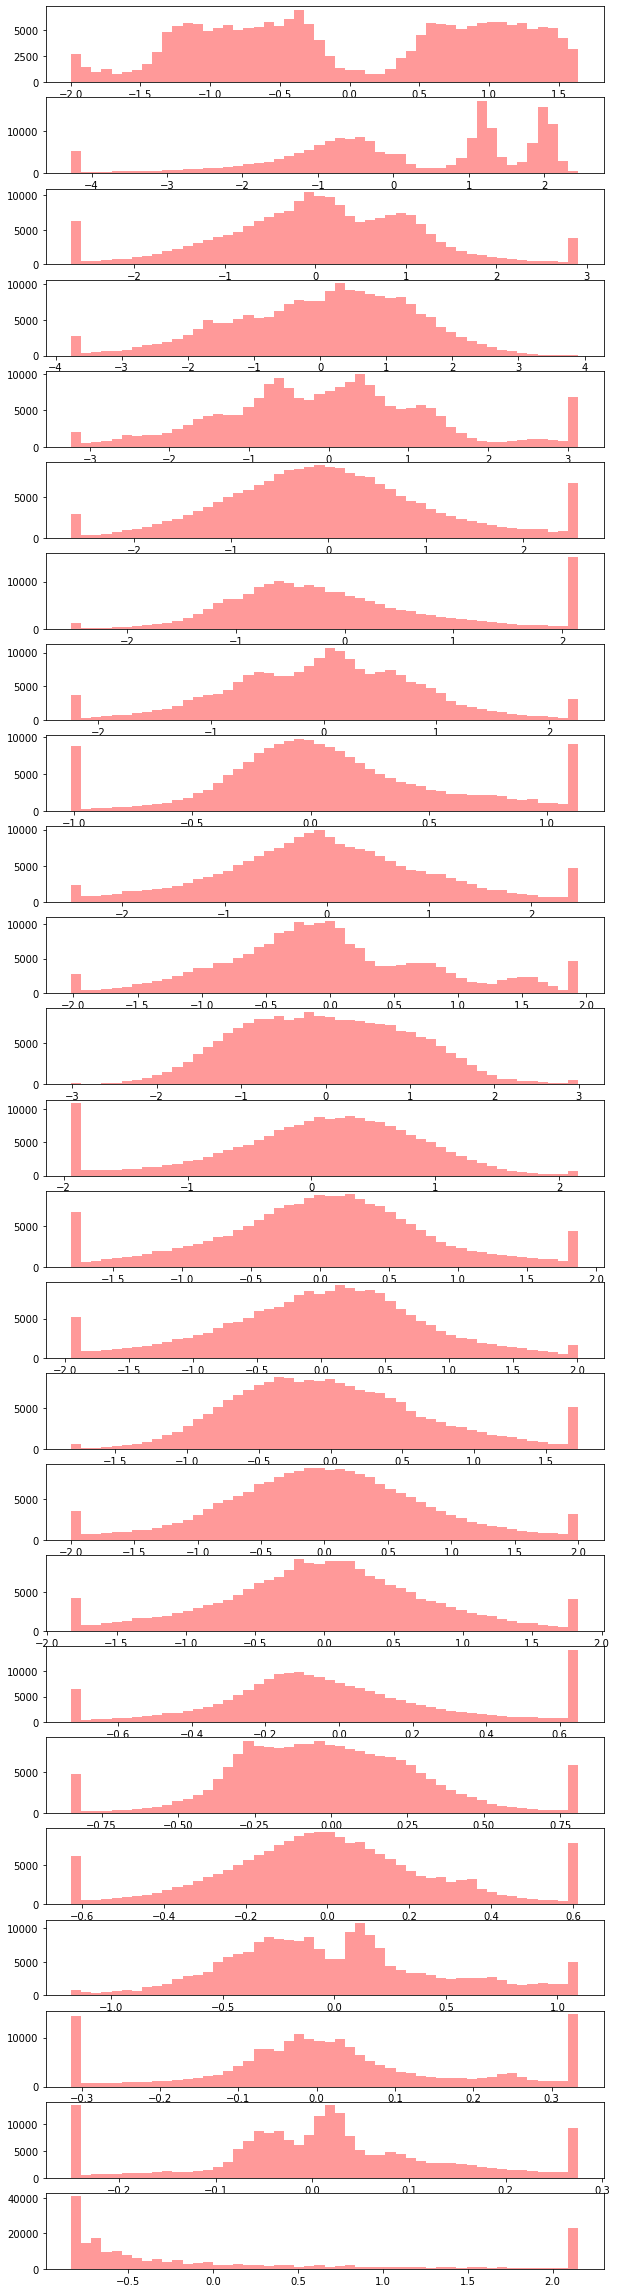

In [18]:
# Checking for skewness in the PCA transformed and scaled variables
plt.figure(figsize = (10,50))
var = [i for i in X_train.columns]
for i,j in enumerate(var):
    plt.subplot(30,1,i+1)
    sns.distplot(X_train[j].values,color='r',kde=False) 

In [19]:
# Making sure the features are properly vetted by adjusting the skewness 
from sklearn.preprocessing import PowerTransformer
transformer=PowerTransformer(method='yeo-johnson')

X_train[var]=transformer.fit_transform(X_train[var])
X_test[var]=transformer.transform(X_test[var])

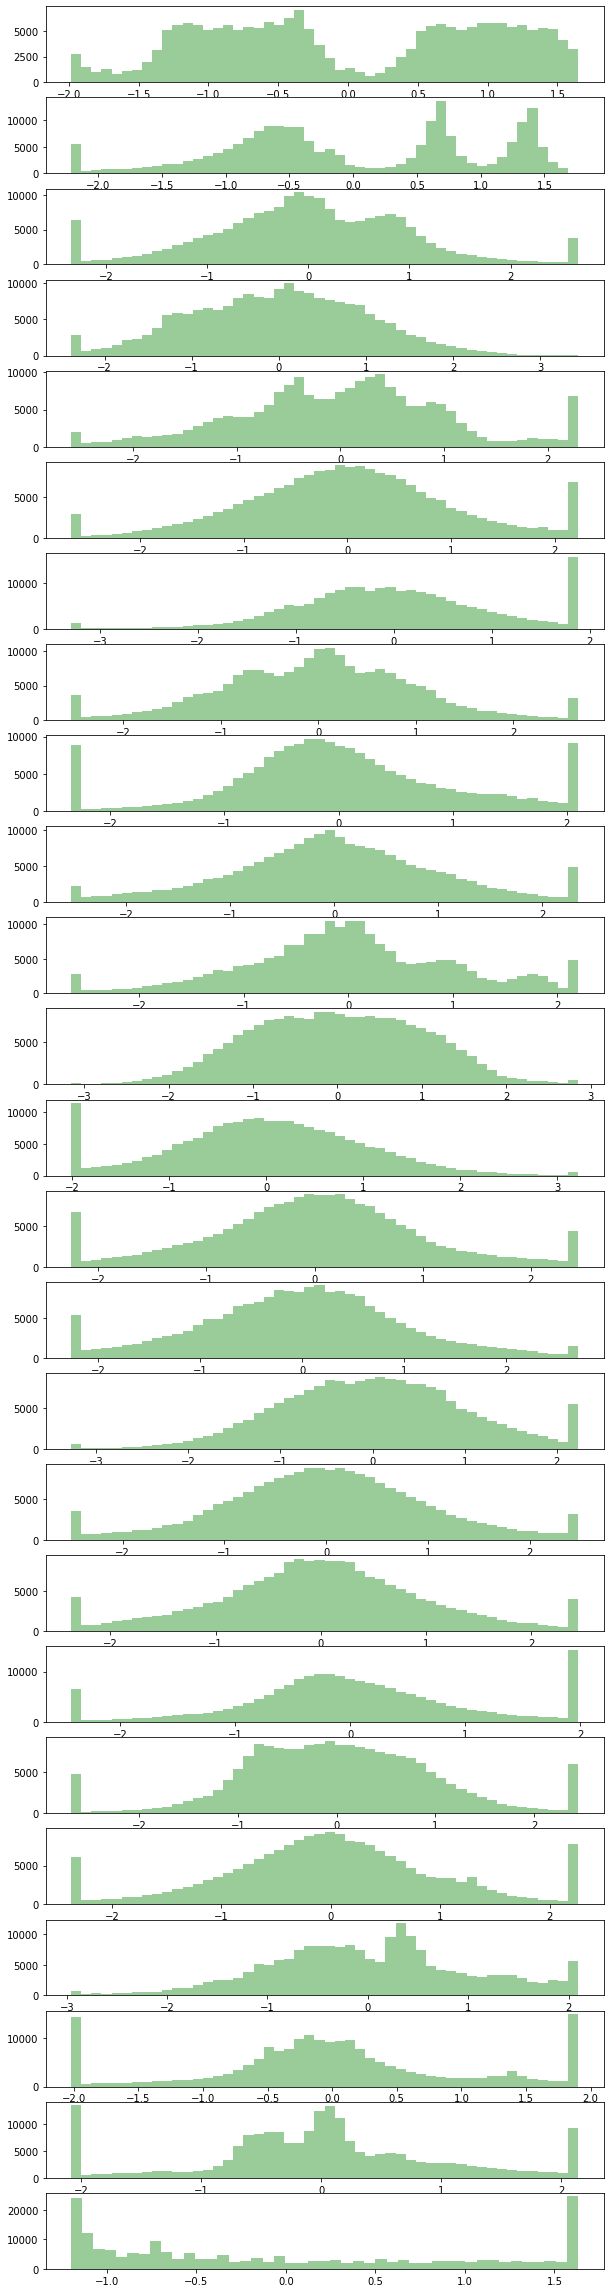

In [20]:
# Distribution of the Transformed variables 
plt.figure(figsize = (10,50))
var = [i for i in X_train.columns]
for i,j in enumerate(var):
    plt.subplot(30,1,i+1)
    sns.distplot(X_train[j].values,color='g',kde=False) 

In [21]:
def model_metrics(cm): # Creating a model metrics function that will return all the important metrics associated with a model
    d={}
    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives
    d['Accuracy']=(TP+TN)/(TP+TN+FP+FN)
    d['Specificity']=TN/(TN+FP)
    d['Sensitivity']=TP/(TP+FN)
    d['Precision']=TP/(TP+FP)
    d['Recall']=TP/(TP+FN)
    d['True Positive Rate']=TP/(TP+FN)
    d['False Positive Rate']=1-TN/(TN+FP)
    d['F1 Score']=2*d['Precision']*d['Recall']/(d['Precision']+d['Recall'])
    return d

## Model Building
- Models are build based on 4 criteria's :
    - Unbalanced Dataset
    - Random Oversampled Dataset
    - SMOTE balanaced Dataset
    - ADASYN balanced dataset

Benchmark models are developed using the Unbalanced data and the expectation is that the balanced dataset will provide better results.

#### Models used in the study:
 - Logistic Regression
 - SVM (Only on balanced dataset- excluded in the rest because it is a resource intensive algorithm)
 - Decision Tree
 - Random Forest
 - XGB Classifier

In [22]:
#Import models and metrics used in model building

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn import metrics

## Unbalanced Data

#### 1.Logistic Regression

In [23]:
log_unbalanced=LogisticRegression(random_state=42)
params={'C': [0.001,0.005,0.01,0.05,0.1,0.15,0.2,0.25,0.3], 
        'penalty': ['l1', 'l2']}

grid=RandomizedSearchCV(estimator=log_unbalanced,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)  
grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.5s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.005, 0.01, 0.05, 0.1,
                                              0.15, 0.2, 0.25, 0.3],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,


In [24]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best auc score obtained after hyperparameter optimisation

{'penalty': 'l2', 'C': 0.15}
0.9843266996842882


#### 2.SVM

In [25]:
svc_unbalanced=SVC(random_state=42)
params = {'kernel': ['rbf','poly','sigmoid']} #Types of kernels in svm. Too expensive to tune other parameters

grid=RandomizedSearchCV(estimator=svc_unbalanced,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42) 
grid.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=42,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'kernel': ['rbf', 'poly', 'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=True)

In [26]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best auc score obtained after hyperparameter optimisation

{'kernel': 'rbf'}
0.9485826162230016


#### 3.Decision Tree

In [27]:
dt_unbalanced=DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': range(10, 100, 15), #parameters are self explanatory
    'min_samples_split': range(10, 100, 15),
    'criterion': ["entropy", "gini"]
}

grid=RandomizedSearchCV(estimator=dt_unbalanced,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   46.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [28]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best auc score obtained after hyperparameter optimisation

{'min_samples_split': 10, 'min_samples_leaf': 25, 'max_depth': 4, 'criterion': 'entropy'}
0.9692606470025016


#### 4.Random Forest

In [29]:
rf_unbalanced=RandomForestClassifier(random_state=42)
params = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': range(10, 200, 20), #parameters are self explanatory
    'min_samples_split': range(10, 200, 20),
    'n_estimators': range(5,30,5), 
    'max_features': [5, 10, 15, 20, 25]
}

grid=RandomizedSearchCV(estimator=rf_unbalanced,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [30]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best auc score obtained after hyperparameter optimisation

{'n_estimators': 25, 'min_samples_split': 130, 'min_samples_leaf': 90, 'max_features': 10, 'max_depth': 6}
0.9777542885386296


#### 5.XGB

In [31]:
xgb_unbalanced=xgb.XGBClassifier(random_state=42,objective ='reg:logistic')
params = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 , 0.35] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 0, 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.5 , 0.7, 0.9 ],
    'n_estimators'     : range(5,30,2),
    'max_features'     : range(5,30,2)
     }

grid=RandomizedSearchCV(estimator=xgb_unbalanced,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                           

In [32]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best score obtained after hyperparameter optimisation

{'n_estimators': 21, 'min_child_weight': 5, 'max_features': 7, 'max_depth': 8, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.5}
0.9747442224719585


### Benchmark Model

In [33]:
# Logistic Regression had the best ROC_AUC score using an unbalanced dataset. Hence, it is used to create the benchmark model.
clf=LogisticRegression(C=0.15,penalty='l2',random_state=42) # Creating the benchmark model using Logistic Regression
clf.fit(X_train,y_train)

LogisticRegression(C=0.15, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
unbalanced_pred=clf.predict(X_test) #Confustion matrix of the benchmark model
cm_unbalanced=metrics.confusion_matrix(y_test,unbalanced_pred)
cm_unbalanced

array([[85273,    22],
       [   40,   108]], dtype=int64)

In [35]:
model_metrics(cm_unbalanced) # model performance of the benchmark model

{'Accuracy': 0.9992743700478681,
 'Specificity': 0.9997420716337417,
 'Sensitivity': 0.7297297297297297,
 'Precision': 0.8307692307692308,
 'Recall': 0.7297297297297297,
 'True Positive Rate': 0.7297297297297297,
 'False Positive Rate': 0.0002579283662582643,
 'F1 Score': 0.7769784172661871}

In [36]:
# Print the FPR,TPR & select the best threshold from the roc curve
print('Test auc of the Benchmark Model=', metrics.roc_auc_score(y_test,unbalanced_pred))
print('Train auc of the Benchmark Model= 0.9843266996842882')
fpr, tpr, thresholds = metrics.roc_curve(y_test,unbalanced_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Test auc of the Benchmark Model= 0.8647359006817358
Train auc of the Benchmark Model= 0.9843266996842882
1


The Benchmark model has decent AUC score and precision-recall scores. It has a precision of 83% and recall of 73%. However, the banks would be more concerned about capturing maximum fraudulent cases (higher recall score) than getting maximum precision.

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Random Oversampling

In [37]:
from imblearn.over_sampling import RandomOverSampler #Minority samples are duplicated to rectify the class imbalance

OverSampler=RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_ro,y_train_ro=OverSampler.fit_resample(X_train,y_train)

#### 1. Logistic Regression

In [38]:
log_oversampler=LogisticRegression(random_state=42)
params={'C': [0.001,0.005,0.01,0.05,0.1,0.15,0.2,0.25,0.3],
        'penalty': ['l1', 'l2']}

grid=RandomizedSearchCV(estimator=log_oversampler,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train_ro,y_train_ro)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    9.7s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.005, 0.01, 0.05, 0.1,
                                              0.15, 0.2, 0.25, 0.3],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,


In [39]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best score obtained after hyperparameter optimisation

{'penalty': 'l2', 'C': 0.25}
0.9914588741389941


#### 2. SVM (Skipped due to high training time)

In [40]:
''''
svc_unbalanced=SVC(random_state=42)
params = {'kernel': ['rbf','poly','sigmoid']}

grid=RandomizedSearchCV(estimator=svc_unbalanced,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train_ro,y_train_ro)
'''

"'\nsvc_unbalanced=SVC(random_state=42)\nparams = {'kernel': ['rbf','poly','sigmoid']}\n\ngrid=RandomizedSearchCV(estimator=svc_unbalanced,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,\n                        random_state=42)\ngrid.fit(X_train_ro,y_train_ro)\n"

In [41]:
'''
print(grid.best_params_)
print(grid.best_score_)
'''

'\nprint(grid.best_params_)\nprint(grid.best_score_)\n'

#### 3. Decision Tree

In [42]:
dt_oversampler=DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': range(10, 100, 15),
    'min_samples_split': range(10, 100, 15),
    'criterion': ["entropy", "gini"]
}

grid=RandomizedSearchCV(estimator=dt_oversampler,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train_ro,y_train_ro)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   55.7s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [43]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best score obtained after hyperparameter optimisation

{'min_samples_split': 40, 'min_samples_leaf': 40, 'max_depth': 8, 'criterion': 'gini'}
0.9994952879904417


#### 4. Random Forest

In [44]:
dt_oversampler=RandomForestClassifier(random_state=42)
params = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': range(10, 200, 20),
    'min_samples_split': range(10, 200, 20),
    'n_estimators': range(5,30,5), 
    'max_features': [5, 10, 15, 20, 25]
}

grid=RandomizedSearchCV(estimator=dt_oversampler,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train_ro,y_train_ro)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [45]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best score obtained after hyperparameter optimisation

{'n_estimators': 25, 'min_samples_split': 130, 'min_samples_leaf': 110, 'max_features': 15, 'max_depth': 10}
0.9999129573847637


#### 5. XGB

In [46]:
xgb_oversampler=xgb.XGBClassifier(random_state=42,objective ='reg:logistic')
params = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 , 0.35] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 0, 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.5 , 0.7, 0.9 ],
    'n_estimators'     : range(5,30,2),
    'max_features'     : range(5,30,2)
     }

grid=RandomizedSearchCV(estimator=xgb_oversampler,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train_ro,y_train_ro)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                           

In [47]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best score obtained after hyperparameter optimisation

{'n_estimators': 21, 'min_child_weight': 5, 'max_features': 7, 'max_depth': 8, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.5}
0.9999509924527077


### Random Oversampling Best Model: XGBoost

In [48]:
clf = xgb.XGBClassifier(random_state=42,objective ='reg:logistic', #Creating the best preditive model using SMOTE
                        n_estimators= 21, min_child_weight= 5,
                        max_features= 7, max_depth= 8, learning_rate= 0.3,
                        gamma= 0.2, colsample_bytree= 0.5)

clf.fit(X_train_ro,y_train_ro) # fit on the balanced dataset

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=8, max_features=7,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=21, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [49]:
oversampler_pred=clf.predict(X_test) #Confustion matrix of the best model
cm_oversampler=metrics.confusion_matrix(y_test,oversampler_pred)
cm_oversampler

array([[85255,    40],
       [   31,   117]], dtype=int64)

In [50]:
model_metrics(cm_oversampler)

{'Accuracy': 0.99916903666772,
 'Specificity': 0.9995310393340758,
 'Sensitivity': 0.7905405405405406,
 'Precision': 0.7452229299363057,
 'Recall': 0.7905405405405406,
 'True Positive Rate': 0.7905405405405406,
 'False Positive Rate': 0.0004689606659241674,
 'F1 Score': 0.7672131147540984}

In [51]:
# Print the FPR,TPR & select the best threshold from the roc curve
print('Test auc of the Benchmark Model=', metrics.roc_auc_score(y_test,oversampler_pred))
print('Train auc of the Benchmark Model= 0.9999509924527077')
fpr, tpr, thresholds = metrics.roc_curve(y_test,unbalanced_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Test auc of the Benchmark Model= 0.8950357899373083
Train auc of the Benchmark Model= 0.9999509924527077
1


Random Oversampling XGBoost has a very high train AUC Score and the ideal Precision-Recall values. This is a good competitor for spot of the best predicitve model.

## SMOTE

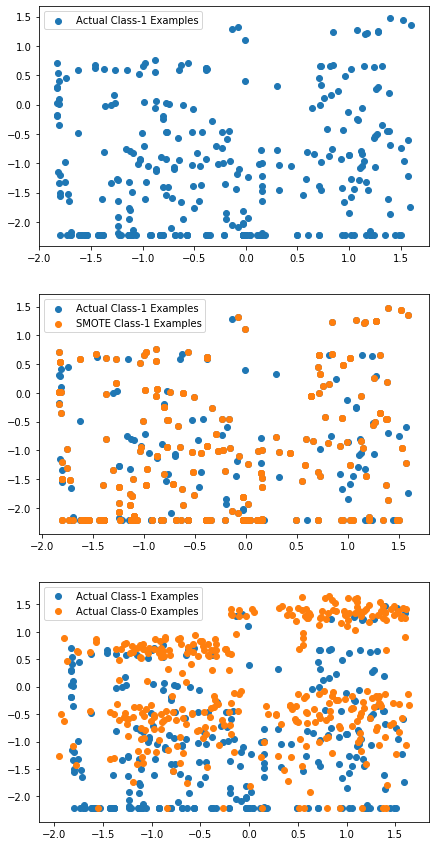

In [52]:
# Visualize how SMOTE oversamples the dataset to correct the data imbalance

from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=42) # New datapoints are synthetically created among the minority samples
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)

X_train_sm_1 = X_train_ro[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [7, 15]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_sm_1.iloc[:X_train_1.shape[0], 0], X_train_sm_1.iloc[:X_train_1.shape[0], 1],
            label='SMOTE Class-1 Examples')

plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.show()

#### 1. Logistic Regression

In [53]:
log_smote=LogisticRegression(random_state=42)
params={'C': [0.001,0.005,0.01,0.05,0.1,0.15,0.2,0.25,0.3],
        'penalty': ['l1', 'l2']}

grid=RandomizedSearchCV(estimator=log_smote,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.005, 0.01, 0.05, 0.1,
                                              0.15, 0.2, 0.25, 0.3],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,


In [54]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best score obtained after hyperparameter optimisation

{'penalty': 'l2', 'C': 0.25}
0.9936533019180175


#### 2. SVM (Skipped due to long training time)

In [55]:
'''
svc_unbalanced=SVC(random_state=42)
params = {'kernel': ['rbf','poly','sigmoid']}

grid=RandomizedSearchCV(estimator=svc_unbalanced,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train_sm,y_train_sm)
'''

"\nsvc_unbalanced=SVC(random_state=42)\nparams = {'kernel': ['rbf','poly','sigmoid']}\n\ngrid=RandomizedSearchCV(estimator=svc_unbalanced,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,\n                        random_state=42)\ngrid.fit(X_train_sm,y_train_sm)\n"

In [56]:
'''
print(grid.best_params_)
print(grid.best_score_)
'''

'\nprint(grid.best_params_)\nprint(grid.best_score_)\n'

#### 3. Decision Tree

In [57]:
dt_smote=DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': range(10, 100, 15),
    'min_samples_split': range(10, 100, 15),
    'criterion': ["entropy", "gini"]
}

grid=RandomizedSearchCV(estimator=dt_smote,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [58]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best score obtained after hyperparameter optimisation

{'min_samples_split': 70, 'min_samples_leaf': 40, 'max_depth': 8, 'criterion': 'entropy'}
0.9978527825991615


#### 4. Random Forest

In [59]:
rf_smote=RandomForestClassifier(random_state=42) 
params = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': range(10, 200, 20),
    'min_samples_split': range(10, 200, 20),
    'n_estimators': range(5,30,5), 
    'max_features': [5, 10, 15, 20, 25]
}

grid=RandomizedSearchCV(estimator=rf_smote,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [60]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best score obtained after hyperparameter optimisation

{'n_estimators': 25, 'min_samples_split': 130, 'min_samples_leaf': 110, 'max_features': 15, 'max_depth': 10}
0.999601103895673


#### 5. XGB

In [61]:
xgb_smote=xgb.XGBClassifier(random_state=42,objective ='reg:logistic') #Logistic because binary classification problem
params = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 , 0.35] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 0, 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.5 , 0.7, 0.9 ],
    'n_estimators'     : range(5,30,2),
    'max_features'     : range(5,30,2)
     }

grid=RandomizedSearchCV(estimator=xgb_smote,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train_sm,y_train_sm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                           

In [62]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best score obtained after hyperparameter optimisation

{'n_estimators': 21, 'min_child_weight': 5, 'max_features': 7, 'max_depth': 8, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.5}
0.9999296167970114


### SMOTE Best Model: XGBoost

In [63]:
clf = xgb.XGBClassifier(random_state=42,objective ='reg:logistic', #Creating the best preditive model using SMOTE
                        n_estimators= 21, min_child_weight= 5,
                        max_features= 7, max_depth= 8, learning_rate= 0.3,
                        gamma= 0.2, colsample_bytree= 0.5)

clf.fit(X_train_sm,y_train_sm) # fit on the balanced dataset

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=8, max_features=7,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=21, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [64]:
smote_pred=clf.predict(X_test) #Confustion matrix of the best model
cm_smote=metrics.confusion_matrix(y_test,smote_pred)
cm_smote

array([[85086,   209],
       [   29,   119]], dtype=int64)

In [65]:
model_metrics(cm_smote)

{'Accuracy': 0.9972145172805262,
 'Specificity': 0.9975496805205464,
 'Sensitivity': 0.8040540540540541,
 'Precision': 0.3628048780487805,
 'Recall': 0.8040540540540541,
 'True Positive Rate': 0.8040540540540541,
 'False Positive Rate': 0.002450319479453622,
 'F1 Score': 0.5}

In [81]:
# Print the FPR,TPR & select the best threshold from the roc curve
print('Test auc of the SMOTE Model =', metrics.roc_auc_score(y_test,smote_pred))
print('Train auc of the SMOTE Model = 0.9999296167970114')
fpr, tpr, thresholds = metrics.roc_curve(y_test,smote_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Test auc of the SMOTE Model = 0.9008018672873002
Train auc of the SMOTE Model = 0.9999296167970114
1


Test AUC is very high with SMOTE XGB Classifier, however the precision is very low(0.36). I believe that wrongly classifying genuine transactions as fraudulent will increase the bank's work load and will thereby result in a lower efficiency than a model with acceptable precision, recall and AUC scores. (Random Oversampler XGBoost model)

## ADASYN

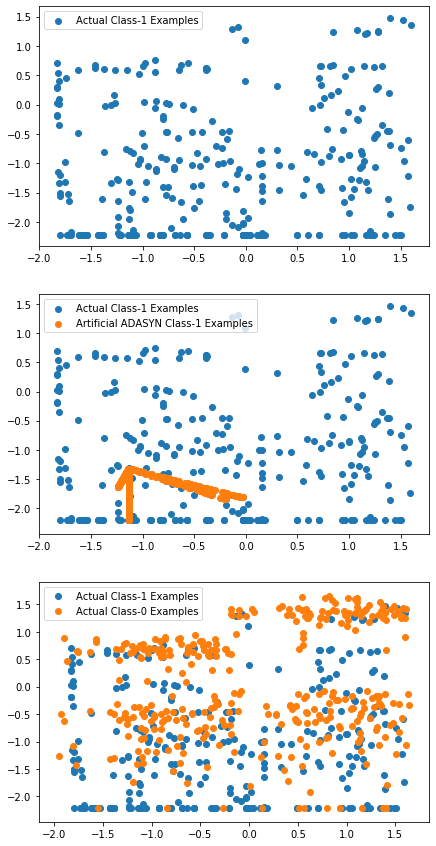

In [67]:
# Visualize how ADASYN is balancing the dataset

import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=42)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_ada_1 = X_train_ada[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [7, 15]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_ada_1.iloc[:X_train_1.shape[0], 0], X_train_ada_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.show()

#### 1.Logistic Regression

In [68]:
log_adasyn=LogisticRegression(random_state=42)
params={'C': [0.001,0.005,0.01,0.05,0.1,0.15,0.2,0.25,0.3],
        'penalty': ['l1', 'l2']}

grid=RandomizedSearchCV(estimator=log_adasyn,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train_ada,y_train_ada)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   13.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=42,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.005, 0.01, 0.05, 0.1,
                                              0.15, 0.2, 0.25, 0.3],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,


In [69]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best score obtained after hyperparameter optimisation

{'penalty': 'l2', 'C': 0.001}
0.9697094038234413


#### 2.Decision Tree

In [70]:
dt_adasyn=DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': range(10, 100, 15),
    'min_samples_split': range(10, 100, 15),
    'criterion': ["entropy", "gini"]
}

grid=RandomizedSearchCV(estimator=dt_adasyn,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train_ada,y_train_ada)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [71]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best score obtained after hyperparameter optimisation

{'min_samples_split': 40, 'min_samples_leaf': 40, 'max_depth': 8, 'criterion': 'gini'}
0.9427946686711537


#### 3.Random Forest

In [72]:
rf_adasyn=RandomForestClassifier(random_state=42)
params = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': range(10, 200, 20),
    'min_samples_split': range(10, 200, 20),
    'n_estimators': range(5,30,5), 
    'max_features': [5, 10, 15, 20, 25]
}

grid=RandomizedSearchCV(estimator=rf_adasyn,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train_ada,y_train_ada)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [73]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best score obtained after hyperparameter optimisation

{'n_estimators': 25, 'min_samples_split': 130, 'min_samples_leaf': 110, 'max_features': 15, 'max_depth': 10}
0.9884202220902768


#### 4. XGB

In [74]:
xgb_adasyn=xgb.XGBClassifier(random_state=42,objective ='reg:logistic')
params = {
    "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 , 0.35] ,
    "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight" : [ 0, 1, 3, 5, 7 ],
    "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
    "colsample_bytree" : [ 0.5 , 0.7, 0.9 ],
    'n_estimators'     : range(5,30,2),
    'max_features'     : range(5,30,2)
     }

grid=RandomizedSearchCV(estimator=xgb_adasyn,param_distributions=params,cv=3,verbose=True,scoring='roc_auc',n_jobs=-1,
                        random_state=42)
grid.fit(X_train_ada,y_train_ada)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   param_distributions={'colsample_bytree': [0.5, 0.7, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                           

In [75]:
print(grid.best_params_) #best parameters after cross validation
print(grid.best_score_) #best score obtained after hyperparameter optimisation

{'n_estimators': 21, 'min_child_weight': 5, 'max_features': 7, 'max_depth': 8, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.5}
0.9919076802380947


### ADASYN Best model: XGBoost

In [76]:
clf = xgb.XGBClassifier(random_state=42,objective ='reg:logistic', #Creating the best preditive model using SMOTE
                        n_estimators= 21, min_child_weight= 5,
                        max_features= 7, max_depth= 8, learning_rate= 0.3,
                        gamma= 0.2, colsample_bytree= 0.5)

clf.fit(X_train_ada,y_train_ada) # fit on the balanced dataset

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=8, max_features=7,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=21, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [77]:
ada_pred=clf.predict(X_test) #Confustion matrix of the best model
cm_ada=metrics.confusion_matrix(y_test,ada_pred)
cm_ada

array([[84974,   321],
       [   29,   119]], dtype=int64)

In [78]:
model_metrics(cm_ada) #Model metrics

{'Accuracy': 0.9959037018831267,
 'Specificity': 0.9962365906559587,
 'Sensitivity': 0.8040540540540541,
 'Precision': 0.27045454545454545,
 'Recall': 0.8040540540540541,
 'True Positive Rate': 0.8040540540540541,
 'False Positive Rate': 0.003763409344041291,
 'F1 Score': 0.40476190476190477}

In [82]:
# Print the FPR,TPR & select the best threshold from the roc curve
print('Test auc of the ADASYN Model =', metrics.roc_auc_score(y_test,ada_pred))
print('Train auc of the ADAYSN Model = 0.9919076802380947')
fpr, tpr, thresholds = metrics.roc_curve(y_test,ada_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Test auc of the ADASYN Model = 0.9001453223550063
Train auc of the ADAYSN Model = 0.9919076802380947
1


Best ADASYN Model is having similar results to SMOTE Model;however, slightly worse in terms of AUC score. But since precision is 0.36 here aswell, Random Oversampling XGBoost is still giving the ideal predictive model.

# Final Best predictive model

By comparing the Benchmark model with the best models of the 3 balancing techniques, it was concluded than RandomOversampling XGBoost is the best predictive model, giving the ideal model metrics for the problem at hand.

In [83]:
# perform the best oversampling method on X_train & y_train
# XGB classifier on random oversampled data is having the best AUC_ROC score on cross-validation.

clf = xgb.XGBClassifier(random_state=42,objective ='reg:logistic', #Creating the final preditive model
                        n_estimators= 21, min_child_weight= 5,
                        max_features= 7, max_depth= 8, learning_rate= 0.3,
                        gamma= 0.2, colsample_bytree= 0.5)

clf.fit(X_train_ro,y_train_ro) # fit on the balanced dataset

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=8, max_features=7,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=21, n_jobs=0, num_parallel_tree=1,
              objective='reg:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [84]:
best_pred=clf.predict(X_test) #Confustion matrix of the best model
cm_best=metrics.confusion_matrix(y_test,best_pred)
cm_best

array([[85255,    40],
       [   31,   117]], dtype=int64)

In [85]:
model_metrics(cm_best) # Model performance of the best model

{'Accuracy': 0.99916903666772,
 'Specificity': 0.9995310393340758,
 'Sensitivity': 0.7905405405405406,
 'Precision': 0.7452229299363057,
 'Recall': 0.7905405405405406,
 'True Positive Rate': 0.7905405405405406,
 'False Positive Rate': 0.0004689606659241674,
 'F1 Score': 0.7672131147540984}

### Understanding feature importance of the final model

Top var = 14
2nd Top var = 13
3rd Top var = 16


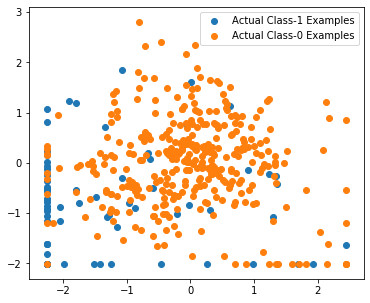

In [86]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1) #Print the index of the top variable
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1) #Print index of 2nd most imp. variable
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1) #Print index of 3rd most imp. variable

# Variable on Index-14 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.rcParams['figure.figsize'] = [6, 5]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

plt.show()

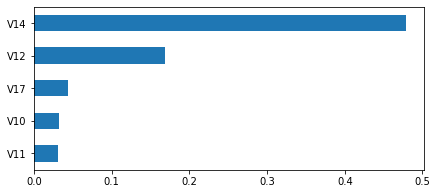

In [87]:
# Feature importances for the top 5 features in the best classification model
k=pd.DataFrame({'col_name': clf.feature_importances_}, index=X.columns).sort_values(by='col_name',ascending=False).head(5)
k.plot(kind='barh',legend=None,figsize=(7,3)).invert_yaxis()
plt.show()

In [89]:
# Print the FPR,TPR & select the best threshold from the roc curve
print('Test auc of the Best Model =', metrics.roc_auc_score(y_test,best_pred))
print('Train auc of the Best Model = 0.9999509924527077')
fpr, tpr, thresholds = metrics.roc_curve(y_test,best_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Test auc of the Best Model = 0.8950357899373083
Train auc of the Best Model = 0.9999509924527077
1


## Conclusion

The primary goal of the project was to create a classification model which can help banks to monitor and identify fraudulent credit card trasnactions successfully. Different models were trained to maximize ROC_AUC score to develop the most efficient models that can classify most fraudulent transactions with minimum misclassifications.

**Benchmark model was developed using optimized Logistic Regression with L2 regularization on the original unbalanced dataset.**   
*Test AUC Score = 0.865*

**Final model was developed using XGBoost Classifier on the dataset balanced using Random Oversampling technique.**  
*Test AUC Score=  0.895*


Since the data is heavily imbalanced, it is more important to accurately predict fraudulent transactions than genuine transactions. More importance is given to Sensitivity (What percentage of total fraudulent transactions are correctly classified) than Precision (Accuracy for predicting fraudulent transactions) because classifying maximum fraudulent cases takes top priority. However, Precision should not be too far off; otherwise it would waste the bank's resources.

The final model has the performance metrics:
    - Sensitivity/Recall: 0.79  
    - Precision: 0.745 

*Confusion Matrix*:  

                    [85255,    40]  
                    [   31,   117]


**- Cost Benefit Analysis**

*Suppose the following hypothesis:*  
1. Benefit of correct fraudulent classification is \\$100 (True Positive),  
2. Benefit of genuine classification is \\$0 (True Negative),  
3. Cost of misclassification(False Positive) is \\$10 and   
4. Opportunity loss (False Negative) is \\$100.  

Hence the total profit to the bank from the final Confusion Matrix is (85255 x 0 - 40 x 10 + 117 x 100 - 31 x 100) => \\$8,200


***The final model would be able to guarantee the bank around \\$8,200 profit, given the same conditions.***